# 통계 스터디 Quiz

- 일시: 2023.12.29(금)
- 범위: 2장
- 출제: 이우진

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open('chapter_2.pkl', 'rb') as file:
    chapter_2 = pickle.load(file)

quiz_1_data = chapter_2['quiz_1']
quiz_2_data = chapter_2['quiz_2']
quiz_3_data = chapter_2['quiz_3']

---

### 1.

상자 수염 그림(box-and-whisker plot) 또는 상자 그림(box plot)은 자료의 특성을 요약하는 그래프이다. 이때 다섯 개의 숫자가 사용되는데, 각각 자료의 최대값, 최소값, 중앙값, 제 1사분위수, 제 3사분위수이다.

In [3]:
quiz_1_data

array([99, 63, 68, 61, 69, 65, 77, 82, 53, 61, 64, 91, 79, 98, 57, 99, 85,
       69, 74, 59, 90, 61, 78, 53, 65, 51, 94, 87, 80, 51, 75, 56, 87, 95,
       55, 83, 78, 84, 97, 63, 83, 85, 79, 93, 75, 83, 80, 94, 54, 84])

위의 ```quiz_1_data```에 대한 상자 그림을 그리고자 한다. 다음의 물음에 답하시오.

#### (1)

자료에 대한 최대값, 최소값, 중앙값, 제 1사분위수, 제 3사분위수를 구하시오.

In [4]:
quiz_1_data_describe = pd.DataFrame(quiz_1_data).describe()
quiz_1_data_describe

,0
count,50.000000
mean,75.320000
std,14.500443
min,51.000000
25%,63.000000
50%,78.000000
75%,85.000000
max,99.000000


pandas의 ```describe()```를 활용하면 다양한 통계 지표들을 확인할 수 있다.

In [5]:
quiz_1_answers = {
    '최대값': quiz_1_data_describe.loc['max'][0],
    '최소값': quiz_1_data_describe.loc['min'][0],
    '중앙값': quiz_1_data_describe.loc['50%'][0],
    '제 1사분위수': quiz_1_data_describe.loc['25%'][0],
    '제 3사분위수': quiz_1_data_describe.loc['75%'][0]
}

for key, value in quiz_1_answers.items():
    print(f"{key}: {round(value, 2)}")

최대값: 99.0
최소값: 51.0
중앙값: 78.0
제 1사분위수: 63.0
제 3사분위수: 85.0


In [6]:
quiz_1_answers = {
    '최대값': np.max(quiz_1_data),
    '최소값': np.min(quiz_1_data),
    '중앙값': np.median(quiz_1_data),
    '제 1사분위수': np.quantile(quiz_1_data, 0.25),
    '제 3사분위수': np.quantile(quiz_1_data, 0.75)
}

for key, value in quiz_1_answers.items():
    print(f"{key}: {round(value, 2)}")

최대값: 99
최소값: 51
중앙값: 78.0
제 1사분위수: 63.0
제 3사분위수: 85.0


혹은 numpy의 다양한 함수들을 활용할 수도 있다.

#### (2)

시각화 라이브러리(matplotlib, seaborn 등)를 활용하여 상자 그림을 그리고, (1)에서 구한 값이 맞는지 검증하시오.

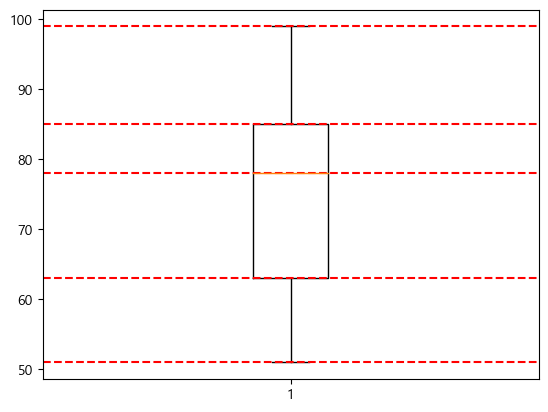

In [7]:
# matplotlib 활용하는 방법
plt.boxplot(quiz_1_data)

for key, value in quiz_1_answers.items():
    plt.axhline(value, linestyle='--', color='red')
    
plt.show()

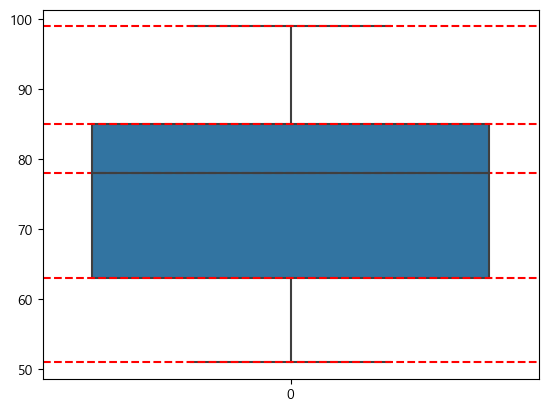

In [8]:
# seaborn 활용하는 방법
sns.boxplot(quiz_1_data)

for key, value in quiz_1_answers.items():
    plt.axhline(value, linestyle='--', color='red')
    
plt.show()

---

### 2.

어떤 IT 기업에서 신입 공채를 진행하고 있다. 공채 전형 중 코딩테스트는 다음의 규칙에 의해 진행되었다.

- 응시자 수는 50명이다.
- '언어'는 Python, Java, C 의 3가지 중 하나이다.
- '점수'는 0 이상 100 이하의 정수이다.

이 코딩테스트의 결과는 다음과 같다.

In [9]:
quiz_2_data

,언어,점수
0,Python,97
1,Python,28
2,C,33
3,C,75
4,Python,59
5,Java,5
6,Python,19
7,Java,20
8,Java,70
9,Java,59


#### (1)
'언어' 컬럼의 도수와 상대도수를 계산하시오.

In [10]:
quiz_2_1_answers = {
    '도수': quiz_2_data['언어'].value_counts(),
    '상대도수': quiz_2_data['언어'].value_counts(normalize=True)
}

pd.DataFrame(quiz_2_1_answers)

,도수,상대도수
Python,25,0.5
Java,15,0.3
C,10,0.2


pandas에는 각 컬럼의 고유값의 개수를 반환하는 함수 ```value_counts()```가 있다. 이때 인자로 ```normalize=True```를 주면 비율로 반환해 준다.

#### (2)
이 회사는 파이썬 사용자를 우대하기 때문에, '언어'에 따른 가중치를 다음과 같이 두고 있다.

```python
weight = {
    'Python': 1.2,
    'Java': 0.9,
    'C': 0.5
}
```

전체 응시자의 점수에 대한 평균과 가중평균을 각각 구하시오.

In [11]:
weight = {
    'Python': 1.2,
     'Java': 0.9,
     'C': 0.5
}

quiz_2_2_answers = {
    '평균': np.mean(quiz_2_data['점수']),
    '가중평균': np.average(quiz_2_data['점수'], weights=quiz_2_data['언어'].map(weight))
}

for key, value in quiz_2_2_answers.items():
    print(f"{key}: {round(value, 2)}")

평균: 49.62
가중평균: 48.89


numpy에서 평균을 구하는 함수는 두 가지가 있다.
- ```np.mean()```은 데이터에 대한 평균을 계산해 준다.
- ```np.average()```는 데이터에 대한 가중평균을 계산해 준다. 이때 weights 인자로 아무 것도 안 넣으면 ```np.mean()```과 동일한 값이 계산된다.

---

### 3.

K대학교에서는 다음과 같은 기준으로 상대평가하여 학점을 매긴다.

|등급|비율|
|:---:|:---:|
|A|35%|
|B|35%|
|F|30%|

어떤 전공 강의를 듣는 학생들 45명의 점수가 다음과 같이 산출되었다.

In [12]:
quiz_3_data

array([99.69, 95.68, 86.94, 63.31, 88.61, 50.7 , 93.58, 95.07, 97.54,
       69.04, 90.89, 96.9 , 70.8 , 86.13, 84.76, 75.18, 67.87, 79.74,
       81.36, 72.94, 92.57, 68.  , 67.9 , 72.  , 54.82, 75.7 , 94.95,
       94.98, 84.21, 65.16, 62.3 , 73.54, 80.45, 96.99, 56.99, 82.31,
       70.75, 80.8 , 62.16, 68.12, 58.87, 67.87, 69.52, 86.73, 58.4 ])

#### (1)
각 등급에서 가장 낮은 점수를 가진 학생을 '수문장'이라고 부른다고 하자. A등급과 B등급의 '수문장'의 점수를 구하시오.

In [13]:
quiz_3_1_answers = {
    'A등급 수문장': np.min(quiz_3_data[quiz_3_data >= np.percentile(quiz_3_data, 65)]),
    'B등급 수문장': np.min(quiz_3_data[quiz_3_data >= np.percentile(quiz_3_data, 30)])
}

for key, value in quiz_3_1_answers.items():
    print(f"{key}: {value}점")

A등급 수문장: 84.76점
B등급 수문장: 69.04점


A등급에 해당하는 학생은 65% 백분위수보다 큰 점수를 가진 학생이다. A등급의 수문장은 A등급에 해당하는 학생들 중 가장 낮은 점수를 가진 학생이다. 백분위수 임계치를 계산해 주는 함수로는 numpy의 ```np.quantile()```을 활용할 수 있고, boolean indexing으로 이 임계치보다 큰 값을 가진 학생들을 찾아낼 수 있다.

#### (2)
응급한 전염병의 사유로 정상적인 수업 진행이 어려워지면서, K대학교에서는 상대평가를 대신해 절대평가 성적 산출을 시행하기로 하였다.

|등급|점수|
|:---:|:---:|
|A|90점 이상|
|B|80점 이상 90점 미만|
|C|70점 이상 80점 미만|
|D|60점 이상 70점 미만|
|F|60점 미만|

절대평가를 시행할 때 각 등급에 대한 도수분포표와 히스토그램을 그리시오.

In [14]:
bins_range = [0] + [i for i in range(60, 101, 10)] #등급 기준

hist, bins = np.histogram(quiz_3_data, bins_range)
bins_to_str = [f'{bins[i]} ~ {bins[i + 1]}' for i in range(len(bins) - 1)]

pd.DataFrame({
    '계급': bins_to_str,
    '도수': hist
}).set_index('계급')

,도수
계급,
0 ~ 60,5
60 ~ 70,11
70 ~ 80,8
80 ~ 90,10
90 ~ 100,11


계급과 도수는 numpy의 ```np.histogram()```으로 쉽게 구할 수 있다. 이때 계급 구간은 직접 설정하여 넣어줄 수 있다. 이 문제에서는 각 등급에 대한 계급 구간이 정해져 있으므로 리스트 형식으로 넘겨주면 된다. 이때 bins는 끝 점으로 주기 때문에 구간 수에 비해 하나가 많다. 따라서 '구간의 시작 ~ 구간의 끝' 형태로 변환해서 넣어줘야 한다.

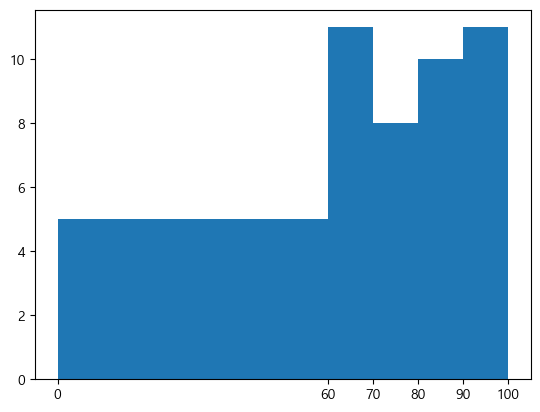

In [15]:
plt.hist(quiz_3_data, bins)

plt.xticks(bins)
plt.show()

히스토그램은 matplotlib의 ```plt.hist()```를 이용해서 그릴 수 있다.

#### (3)
K대학교에서는 평점을 매길 때 다음과 같은 가중치를 적용한다.

|등급|가중치|
|:---:|:---:|
|A|4.5|
|B|3.5|
|C|2.5|
|D|1.5|
|F|0|

(1)에서의 상대평가안과 (2)에서의 절대평가안에 대하여, 전체 학생들의 평점의 평균을 각각 계산하시오.

In [3]:
scores = pd.DataFrame({
    '상대평가': [
        4.5 if score >= np.percentile(quiz_3_data, 65)
        else 3.5 if score >= np.percentile(quiz_3_data, 30)
        else 0 for score in quiz_3_data
    ],
    '절대평가': [
        4.5 if score >= 90 else 3.5 if score >= 80 else 2.5 if score >= 70
        else 1.5 if score >= 60 else 0 for score in quiz_3_data
    ]
})

quiz_3_3_answers = {
    '상대평가': scores['상대평가'].mean(),
    '절대평가': scores['절대평가'].mean()
}

for key, value in quiz_3_3_answers.items():
    print(f"{key}: {round(value, 2)}")

상대평가: 2.77
절대평가: 2.69


학생들의 점수를 상대평가, 절대평가 각각에 대한 등급으로 변환한 뒤 평균을 구하면 된다.

---

### Appendix

In [2]:
# 1번 데이터 생성
np.random.seed(826)
quiz_1_data = np.random.randint(50, 100, 50)

In [3]:
# 2번 데이터 생성
np.random.seed(826)
quiz_2_language = ['Python' for i in range(25)] + ['Java' for i in range(15)] + ['C' for i in range(10)]
np.random.shuffle(quiz_2_language)
quiz_2_score = np.random.randint(0, 101, 50)
quiz_2_data = pd.DataFrame({'언어': quiz_2_language, '점수': quiz_2_score})

In [4]:
# 3번 데이터 생성
np.random.seed(826)
quiz_3_data = np.round(np.random.rand(45) * 100, 2)
quiz_3_data[quiz_3_data < 20] *= 5
quiz_3_data[quiz_3_data < 25] *= 4
quiz_3_data[quiz_3_data < 33] *= 3
quiz_3_data[quiz_3_data < 50] *= 2

In [6]:
# 데이터 합쳐서 저장
chapter_2 = {
    'quiz_1': quiz_1_data,
    'quiz_2': quiz_2_data,
    'quiz_3': quiz_3_data
}

with open('chapter_2.pkl', 'wb') as file:
    pickle.dump(chapter_2, file)